<a href="https://colab.research.google.com/github/Saikumar1422/excelr-data-science-assignments/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.shape

(50, 5)

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# EDA

<Axes: xlabel='State', ylabel='Profit'>

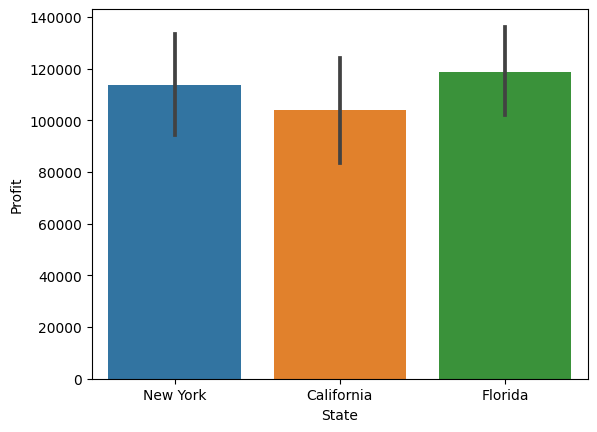

In [ ]:
sns.barplot(x=df['State'],y=df['Profit'])

<Axes: xlabel='Profit', ylabel='Count'>

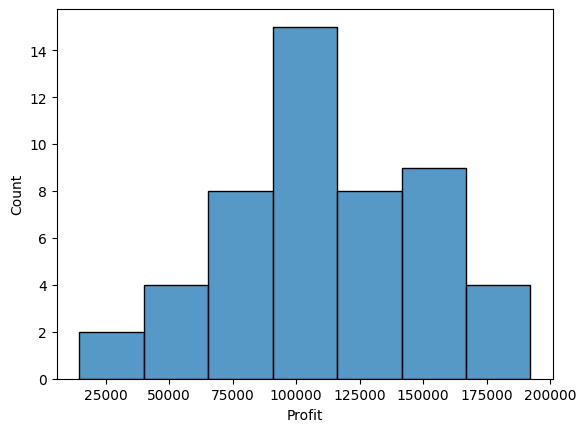

In [ ]:
sns.histplot(df['Profit'])

<Axes: xlabel='State', ylabel='Marketing Spend'>

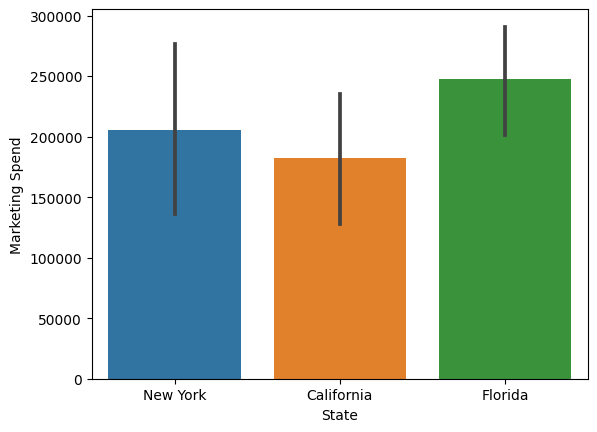

In [ ]:
sns.barplot(x=df['State'],y=df['Marketing Spend'])

<Axes: xlabel='Profit', ylabel='Density'>

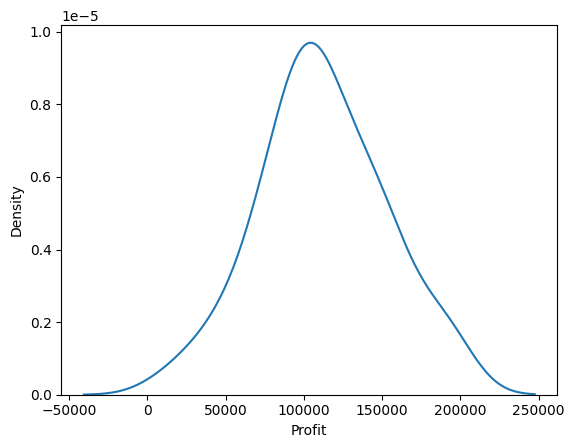

In [ ]:
sns.kdeplot(df['Profit'])

Perfectly follows normal distribution


<ipython-input-28-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

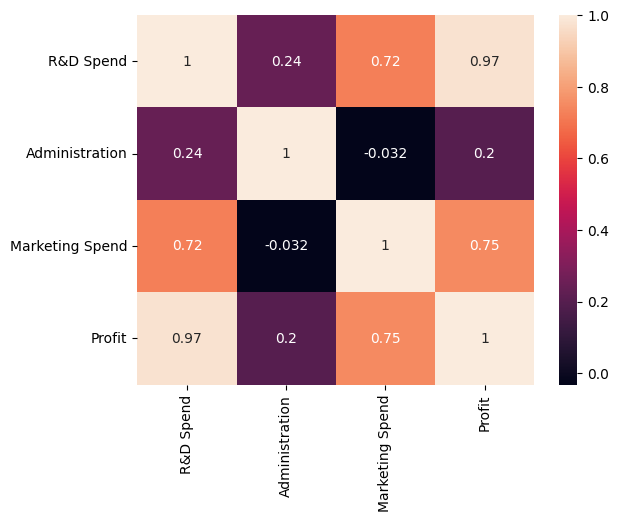

In [ ]:
sns.heatmap(df.corr(), annot=True)


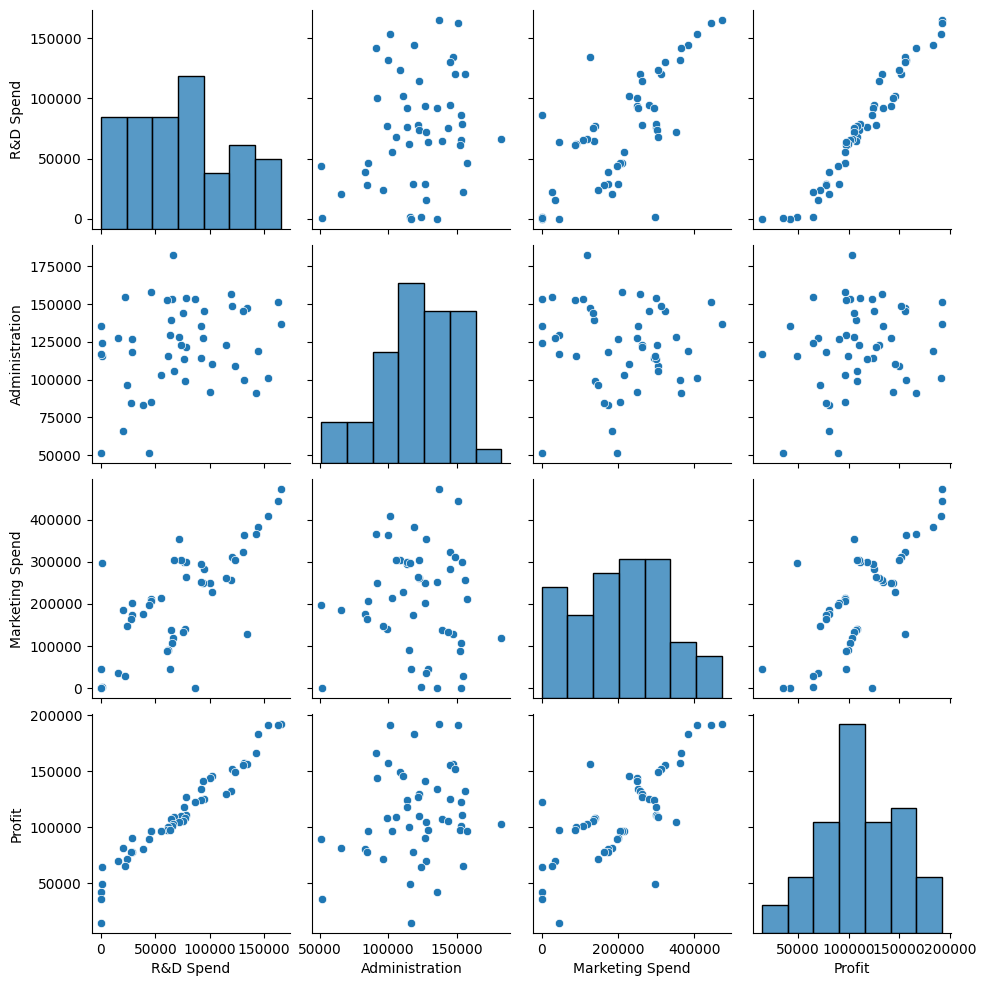

In [ ]:
sns.pairplot(df)

In [ ]:
df=pd.get_dummies(df,columns=['State'])

In [ ]:
# x=df.iloc[:,:-1]
# y=df.iloc[:,-1:]

In [ ]:
x = df[['R&D Spend','Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
y = df[['Profit']]


In [ ]:
# model = sm.OLS(Y,X).fit()
# predictions = model.predict(X)

In [ ]:
# model.summary()


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(40, 6)
(10, 6)


In [ ]:
reg=LinearRegression()

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.9347068473282423

In [ ]:
reg.coef_

array([[ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02,
         8.66383692e+01, -8.72645791e+02,  7.86007422e+02]])

In [ ]:
reg.intercept_

array([42467.52924855])